In [50]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# algorithms

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# deep learning

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import History
from tensorflow import keras as keras

# ensemble learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost.sklearn import XGBClassifier

# metrics
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
import scipy.stats as ss

# suppress anoying warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# dataset loading

data = pd.read_csv("C:\\Users\\dell\\Desktop\\wine.csv")

In [3]:
# checking first 5 rows 

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# shufle data is a good practice when order is not important

data = data.sample(frac=1).reset_index(drop=True)

In [5]:
# let's check now

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
1,10.4,0.28,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.5,5
2,7.6,0.90,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,5
3,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,7
4,7.6,0.41,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5


In [6]:
# checking the size 

data.shape

(1599, 12)

In [7]:
# checking columns type and missing values (no missing values all values are numeric)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# checking missing values one more time to be sure

missing_values = data.isna().mean()
missing_values

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [9]:
# showing basic statistics

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# first let's check quantile 0.95 and 0.99

data.quantile([0.95,0.99, 1])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0.95,11.8,0.84,0.6000,5.100,0.12610,35.00,112.1,1.000000,3.5700,0.9300,12.5,7.0
0.99,13.3,1.02,0.7002,8.306,0.36016,50.02,145.0,1.001506,3.7002,1.2604,13.4,8.0
1.00,15.9,1.58,1.0000,15.500,0.61100,72.00,289.0,1.003690,4.0100,2.0000,14.9,8.0


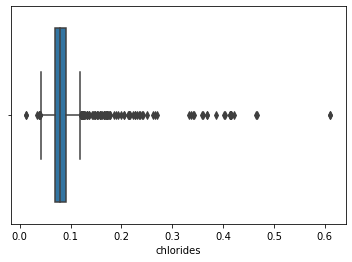

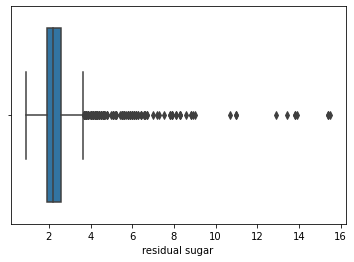

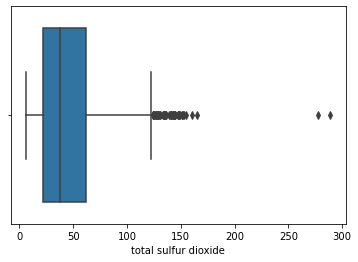

In [11]:
# plotting boxplots for some features to search for outliers based on previouse cell 
# I choose to check chlorides, residual sugar, total sulfur dioxide


columns_to_check = ['chlorides', 'residual sugar', 'total sulfur dioxide']


for column in columns_to_check:
    sns.boxplot(data[column])
    plt.xlabel(f'{column}')
    plt.show()

In [12]:
# I decide to filter dataset by removing values in colum total sulfur dioxide that are bigger than 99,9% percentile and
# in column residual sugar bigger that 99,85% percentile

data=data[data['total sulfur dioxide']<data['total sulfur dioxide'].quantile(0.999)]

data=data[data['residual sugar']<data['residual sugar'].quantile(0.9985)]

In [13]:
# We lost only five rows

data.shape

(1594, 12)

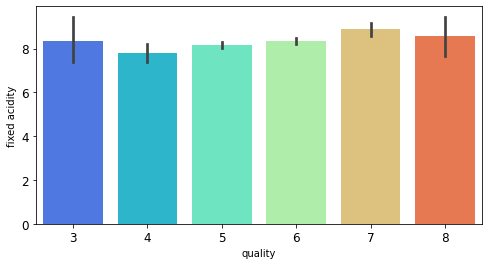

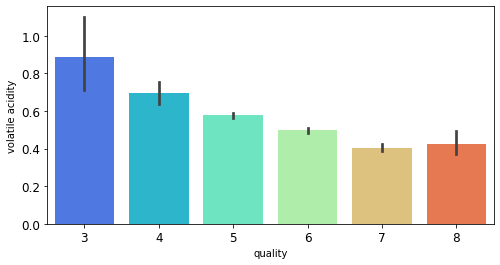

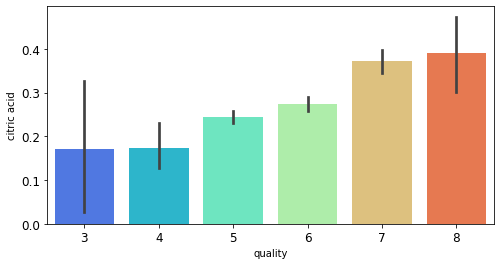

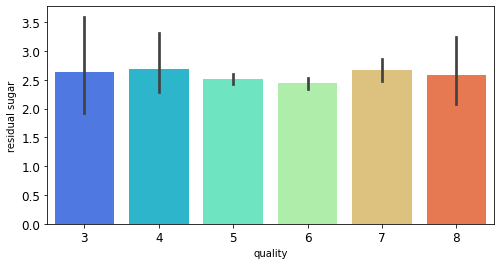

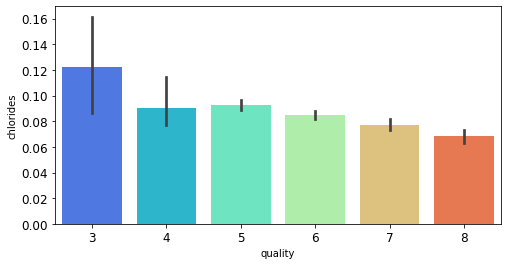

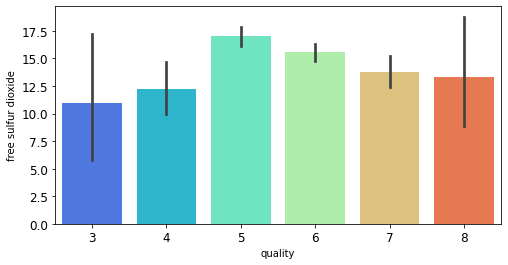

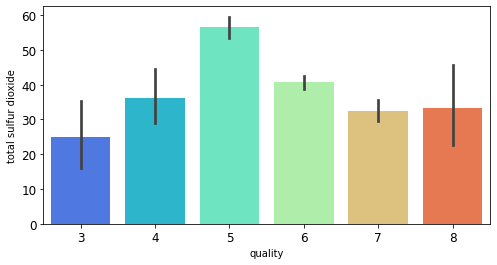

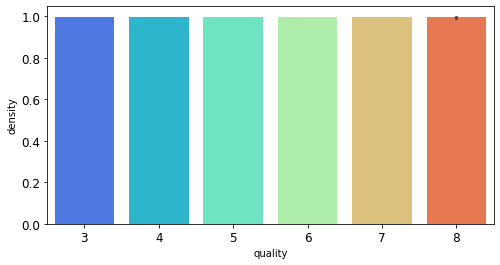

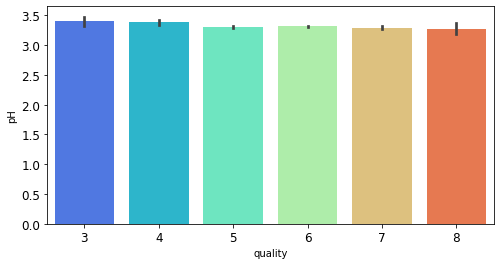

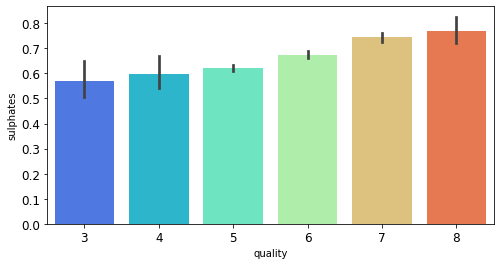

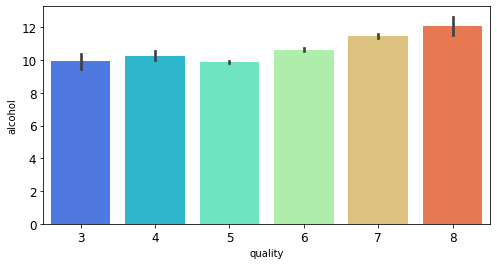

In [14]:
# plotting the relations between every features and quality

for column in data.columns[:-1]:
    fig = plt.figure(figsize = (8,4))
    sns.barplot(x = 'quality', y = data[column], data = data, palette='rainbow')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

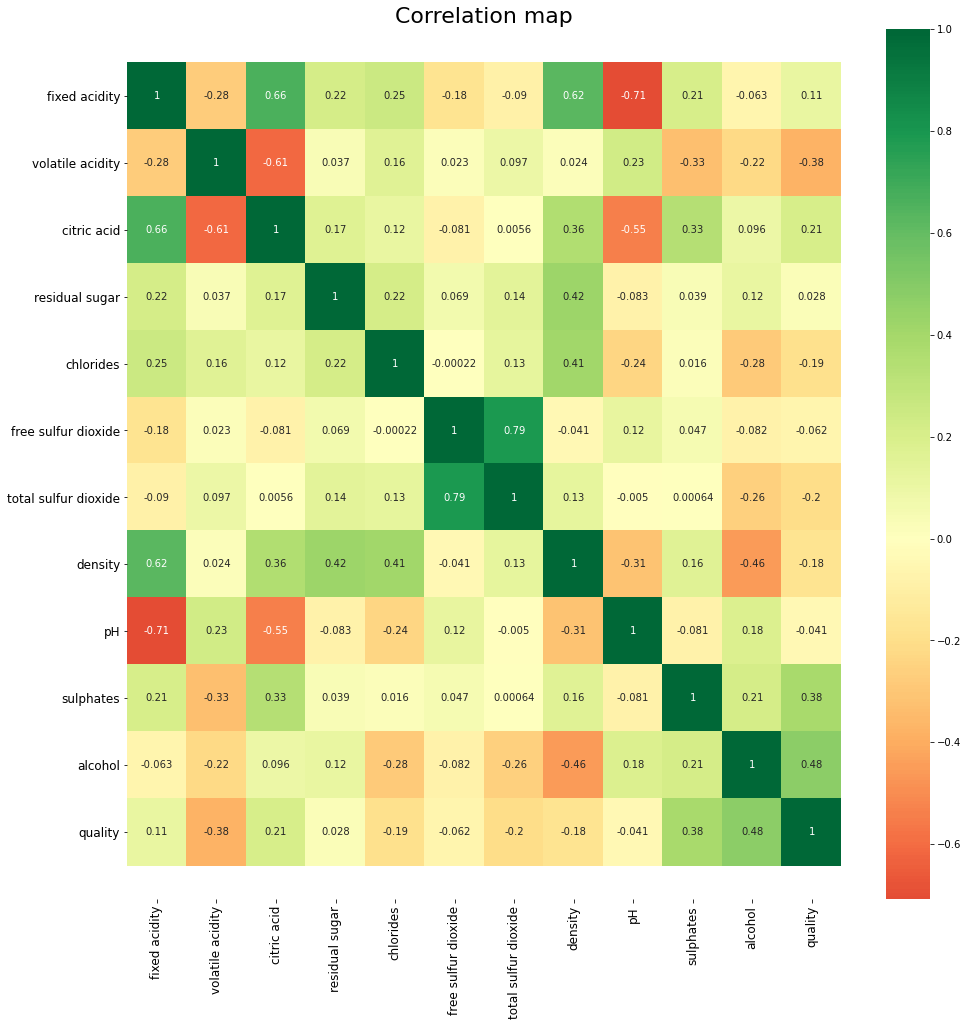

In [15]:
# plotting correlation beetwen features using Spearman method 

plt.figure(figsize=(16, 16))
ax = sns.heatmap(data.corr(method='spearman'), 
                 xticklabels=data.corr().columns, 
                 yticklabels=data.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

plt.title('Correlation map', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Conclusions.

1. There are no columns with missing values
2. Free sulfur dioxide and total sulfur dioxide - high correlations, maybe we could leave total sulfur dioxide which has better colleration with quality
3. We also can think about pH that it may be not very importent to our predictions. We will use RFE 

In [16]:
# check unique values in column quality

data['quality'].unique()

array([6, 5, 7, 4, 8, 3], dtype=int64)

In [17]:
# making binary classificaion, dividing wine quality into two class: bad<6.5, good>6.5 

label_names = ['bad', 'good']
bins = (2, 6.5, 8)
data['quality'] = pd.cut(data['quality'], bins = bins, labels = label_names)

In [18]:
# checking distribiution 

data['quality'].value_counts()/len(data)

bad     0.865119
good    0.134881
Name: quality, dtype: float64

In [19]:
# using label encoder to change 'bad'->0, 'good'->1

quality_label = LabelEncoder()
data['quality'] = quality_label.fit_transform(data['quality'])

In [20]:
# droping one column -> free sulfur dixide

data.drop('free sulfur dioxide',inplace=True, axis=1)


In [21]:
# seperate the dataset : response variable (y) and feature variabes (X)

X = data.drop('quality', axis = 1)
y = data['quality']

In [22]:
# splitting data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
# dataset 86,5% -> class 0, 13,5% -> class 1  
# imbalanced data, to change it we use resampling- combination of oversampling + undersampling 
 

sm = SMOTE(sampling_strategy=0.5)
tl = TomekLinks(sampling_strategy='all')

smtl = SMOTETomek(smote=sm, tomek=tl)

X_train_smtl, y_train_smtl = smtl.fit_resample(X_train, y_train)


In [24]:
# after SMOTETomek we have new distribution 67% -> class 0, 33% -> class 1 

y_train_smtl.value_counts()/len(y_train_smtl)

0    0.671651
1    0.328349
Name: quality, dtype: float64

In [94]:
# My approach was to test all models with parameters at te same time 
# Setting models with parameters using pipelines
# Scaling data even that not all models need it
# RFE for removing the least important features (estimator -LogisticRegression,DecisionTreeClassifier)


models= [(make_pipeline(StandardScaler(), RFE(LogisticRegression()), LogisticRegression(solver="liblinear")),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [9,10],
         'logisticregression__penalty': ['l1', 'l2'],
         'logisticregression__C': [0.001,0.01,0.02,0.1]}
         ),
         (make_pipeline(StandardScaler(),RFE(DecisionTreeClassifier()), DecisionTreeClassifier()),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [8,9],
         'decisiontreeclassifier__criterion': ["gini", "entropy"],
         'decisiontreeclassifier__min_samples_split': [30,32]}
         ),
         (make_pipeline(RFE(DecisionTreeClassifier()), BaggingClassifier(DecisionTreeClassifier())),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [8,9,10],
         'baggingclassifier__n_estimators': [70,71],
         'baggingclassifier__max_samples' : [0.2, 1.0]}
         ),
         (make_pipeline(StandardScaler(),RFE(DecisionTreeClassifier()), RandomForestClassifier()),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [8,9,10],
         'randomforestclassifier__n_estimators': [55,57]}
         ),
         (make_pipeline(StandardScaler(),RFE(DecisionTreeClassifier()), SVC()),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [9,10],
         'svc__C' : [1,1.2,10,11],
         'svc__gamma' : [0.9,0.95],
         'svc__kernel' : ['sigmoid', 'linear', 'rbf']}
         ),
         (make_pipeline(RFE(DecisionTreeClassifier()), XGBClassifier()),
        {
         'rfe__step' : [5,6],
         'rfe__n_features_to_select' : [9,10],
         'xgbclassifier__max_depth': [8,9],
         'xgbclassifier__learning_rate': [0.451,0.452,0.46],
         'xgbclassifier__n_estimators': [400],
         'xgbclassifier__gamma': [0.01,0.015] 
        }),
                
        
]

In [95]:
# creating list best and append there the best params useing Grid Search

best = []
for model, params in models:
    gs = GridSearchCV(model, param_grid=params, cv=10)
    gs.fit(X_train_smtl, y_train_smtl)
    best.append((gs.best_estimator_, gs.best_params_))

[22:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [96]:
# from the best parameters checking acc,recall,precision,f1 score although the most important for us is accuracy, 
# how many good predictions model made 


for model, params in best:
    print(model)
    print(accuracy_score(y_test, model.predict(X_test)))
    print(recall_score(y_test, model.predict(X_test)))
    print(precision_score(y_test, model.predict(X_test)))
    print(f1_score( y_test,model.predict(X_test)))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=10,
                     step=5)),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])
0.8683385579937304
0.6829268292682927
0.49122807017543857
0.5714285714285715
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9,
                     step=6)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=32))])
0.8369905956112853
0.5609756097560976
0.40350877192982454
0.46938775510204084
Pipeline(steps=[('rfe',
                 RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9,
                     step=6)),
                ('baggingclassifier',
                 Bag

RandomForest best accuracy 89,97% 

In [ ]:
# now let's make another approach and built Neural Network
# # learning rate schedule

def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

In [59]:
# creating model 

history_A = History()
model = Sequential()
model.add(Dense(2000,activation="relu",input_shape=(10,)))
model.add(Dense(1000,activation="sigmoid"))
model.add(Dense(500,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam, metrics=["accuracy"])
lrate = LearningRateScheduler(step_decay)
early_stopping = EarlyStopping(monitor='val_loss', patience=120, mode='min', verbose=1)
model.fit(X_train_smtl, y_train_smtl, validation_data= (X_test, y_test), epochs=4000, callbacks=[lrate,early_stopping,history_A])
model.evaluate(X_test,y_test)
y_pred = model.predict_classes(X_test)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 2000)              22000     
_________________________________________________________________
dense_69 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_70 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_71 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_72 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 51        
Total params: 2,578,701
Trainable params: 2,578,701
Non-trainable params: 0
___________________________________________

Epoch 50/4000
51/51 [==============================] - 2s 30ms/step - loss: 0.3312 - accuracy: 0.8602 - val_loss: 0.3585 - val_accuracy: 0.8182
Epoch 51/4000
51/51 [==============================] - 2s 31ms/step - loss: 0.3211 - accuracy: 0.8626 - val_loss: 0.3637 - val_accuracy: 0.8182
Epoch 52/4000
51/51 [==============================] - 2s 33ms/step - loss: 0.3332 - accuracy: 0.8551 - val_loss: 0.3445 - val_accuracy: 0.8307
Epoch 53/4000
51/51 [==============================] - 2s 33ms/step - loss: 0.3276 - accuracy: 0.8574 - val_loss: 0.3583 - val_accuracy: 0.8245
Epoch 54/4000
51/51 [==============================] - 2s 32ms/step - loss: 0.3383 - accuracy: 0.8600 - val_loss: 0.3549 - val_accuracy: 0.8245
Epoch 55/4000
51/51 [==============================] - 2s 30ms/step - loss: 0.3390 - accuracy: 0.8568 - val_loss: 0.3432 - val_accuracy: 0.8307
Epoch 56/4000
51/51 [==============================] - 2s 31ms/step - loss: 0.3481 - accuracy: 0.8451 - val_loss: 0.3613 - val_accuracy:

Epoch 107/4000
51/51 [==============================] - 2s 35ms/step - loss: 0.3224 - accuracy: 0.8608 - val_loss: 0.3526 - val_accuracy: 0.8245
Epoch 108/4000
51/51 [==============================] - 2s 32ms/step - loss: 0.3218 - accuracy: 0.8677 - val_loss: 0.3530 - val_accuracy: 0.8245
Epoch 109/4000
51/51 [==============================] - 2s 33ms/step - loss: 0.3138 - accuracy: 0.8699 - val_loss: 0.3529 - val_accuracy: 0.8245
Epoch 110/4000
51/51 [==============================] - 2s 34ms/step - loss: 0.3246 - accuracy: 0.8632 - val_loss: 0.3531 - val_accuracy: 0.8245
Epoch 111/4000
51/51 [==============================] - 2s 33ms/step - loss: 0.3331 - accuracy: 0.8607 - val_loss: 0.3532 - val_accuracy: 0.8245
Epoch 112/4000
51/51 [==============================] - 2s 32ms/step - loss: 0.3325 - accuracy: 0.8528 - val_loss: 0.3527 - val_accuracy: 0.8245
Epoch 113/4000
51/51 [==============================] - 2s 34ms/step - loss: 0.3178 - accuracy: 0.8659 - val_loss: 0.3522 - val_ac

In [60]:
# checking accuracy score

print(accuracy_score(y_test, y_pred))

0.8244514106583072


Conclusion. Sometimes simpler approach is better:) 
RandomForest has the best accuracy. 